# 📘 Real-Time Age, Gender, and Race Prediction with Multi-Output CNN and OpenCV

> This project demonstrates the development and real-time deployment of a **multi-output Convolutional Neural Network (CNN)** model capable of predicting **age (regression)**, **gender (classification)**, and **race (classification)** from facial images. The model is trained using the **Keras Functional API**, and integrated with **OpenCV** to enable live facial detection via webcam or video feed.  
>  
> The system showcases real-time **human attribute recognition** by combining deep learning and computer vision, enabling practical applications in **smart surveillance**, **interactive systems**, and **demographic analytics**. The model is even capable of recognizing **multiple faces** and detecting faces **shown on phone screens in live video**, demonstrating its robustness and generalization.

> **👤 Author:** *Alden Quiñones*

---

## 1. 📦 Library Imports and Setup

This section prepares the environment by importing all the essential libraries:

- **OpenCV (`cv2`)**: Real-time face detection and video feed handling.
- **NumPy (`numpy`)**: Numerical computations and array operations.
- **Matplotlib & Seaborn**: Visualizing data distributions, confusion matrices, training history.
- **Pandas**: Data manipulation and tabular representation of results.
- **TensorFlow (Keras)**: Model creation, training, and inference.
- **Scikit-learn**: Dataset splitting, metrics, and utilities.
- **Rich**: Displays elegant progress bars during image loading and preprocessing.

---

## 2. ⚙️ Installation Guide

To set up the environment, open **Command Prompt (Windows)** or **Terminal (Linux/macOS)** and install the required packages using `pip`:

```bash
pip install tensorflow opencv-python numpy matplotlib seaborn pandas scikit-learn rich

---
## Code Snippet #1: Code for Importing Required Libraries

### Function:

This snippet imports all necessary Python libraries for the real-time CNN-based age, gender, and race prediction project. OpenCV handles image processing and webcam interaction. NumPy and Pandas manage data structures and numerical operations. Matplotlib and Seaborn are used for visualization. Scikit-learn offers utility functions for data preprocessing and evaluation. Keras (via TensorFlow) defines and trains the multi-output CNN model. The rich library provides elegant CLI progress tracking.

In [1]:
# -*- coding: utf-8 -*-
# pip install tensorflow opencv-python matplotlib seaborn pandas scikit-learn rich

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from rich.progress import track

---
## Code Snippet #2: Code for Loading and Preprocessing the UTKFace Dataset

### Function:
This code loads the UTKFace dataset and preprocesses each image by resizing to 64x64 and normalizing pixel values. The image filenames encode age, gender, and race information, which are parsed and stored in separate arrays. Gender and race labels are one-hot encoded to suit classification objectives in neural networks. This ensures the data is in a format suitable for training a multi-output CNN.


In [2]:
print("Loading and preprocessing images...")
X, age_labels, gender_labels, race_labels = [], [], [], []

for file in track(os.listdir("./UTKFace"), description="Processing images..."):
    try:
        age, gender, race = map(int, file.split('_')[:3])
        img = cv2.resize(cv2.imread(os.path.join("./UTKFace", file)), (64, 64))
        X.append(img)
        age_labels.append(age)
        gender_labels.append(gender)
        race_labels.append(race)
    except:
        continue

X = np.array(X, dtype="float32") / 255.0
age_labels = np.array(age_labels)
gender_labels_cat = to_categorical(gender_labels := np.array(gender_labels), 2)
race_labels_cat = to_categorical(race_labels := np.array(race_labels), 5)

Loading and preprocessing images...


FileNotFoundError: [WinError 3] The system cannot find the path specified: './UTKFace'

### Dataset Description:

The UTKFace dataset is a large-scale face dataset with a wide age range (0 to 116 years). Each image filename is formatted as [age]_[gender]_[race]_[date&time].jpg, allowing label extraction. It contains 23,708 labeled face images of diverse ethnicities and genders, captured under uncontrolled conditions. This makes it suitable for building robust models for real-world age, gender, and race estimation.


---
## Code Snippet #3: Code for Visualizing the Dataset

### Function:


This code creates three visualizations using Seaborn: a histogram for age distribution and count plots for gender and race. It assumes that the DataFrame df has already been defined in a previous code cell. The custom color palettes improve clarity and visual appeal. These charts are useful for evaluating dataset balance and identifying demographic biases that may impact model performance.
are needed.


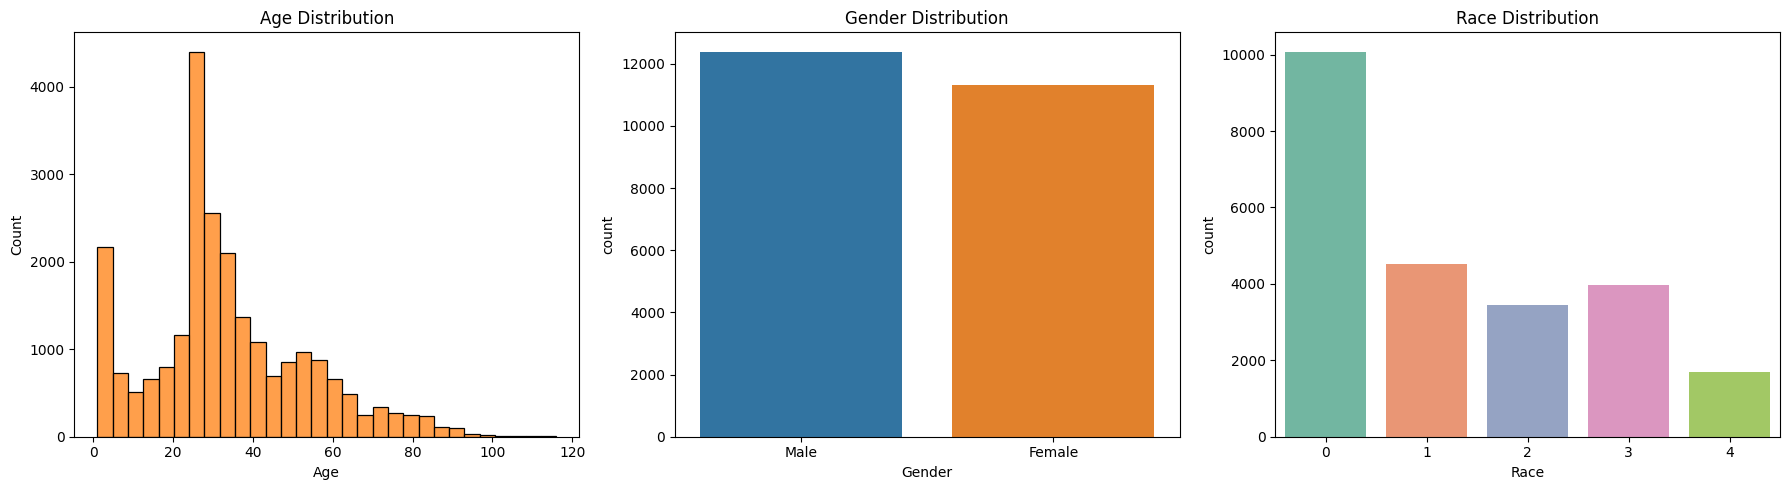

In [22]:
df = pd.DataFrame({
    'Age': age_labels,
    'Gender': ['Male' if g == 0 else 'Female' for g in gender_labels],
    'Race': race_labels
})

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Age'], bins=30, color="#FF7F0E", ax=axes[0]).set(title="Age Distribution")
sns.countplot(x='Gender', hue='Gender', data=df, palette={'Male': '#1f77b4', 'Female': '#ff7f0e'}, ax=axes[1], legend=False).set(title="Gender Distribution")
sns.countplot(x='Race', hue='Race', data=df, palette=sns.color_palette("Set2", 5), ax=axes[2], legend=False).set(title="Race Distribution")

plt.tight_layout(); plt.show()

### Description:

The plots show the distribution of age, gender, and race labels. The age distribution histogram indicates more samples in younger age groups, while the gender and race count plots reveal potential imbalances. Gender data might be fairly balanced, but race classes are skewed, with the "White" class having the most samples. These insights inform model performance and fairness.


---
## Code Snippet #4: Display Sample Images
### Function:
This code randomly selects and displays 10 images from the dataset to visually verify correct loading and labeling. Each subplot shows the image and its corresponding Age, Gender, and Race label. This step is helpful in validating dataset integrity before training.
accurate.

In [19]:
df

,Age,Gender,Race
0,100,Male,0
1,100,Male,0
2,100,Female,0
3,100,Female,0
4,100,Female,0
...,...,...,...
23700,9,Female,3
23701,9,Female,3
23702,9,Female,4
23703,9,Female,4


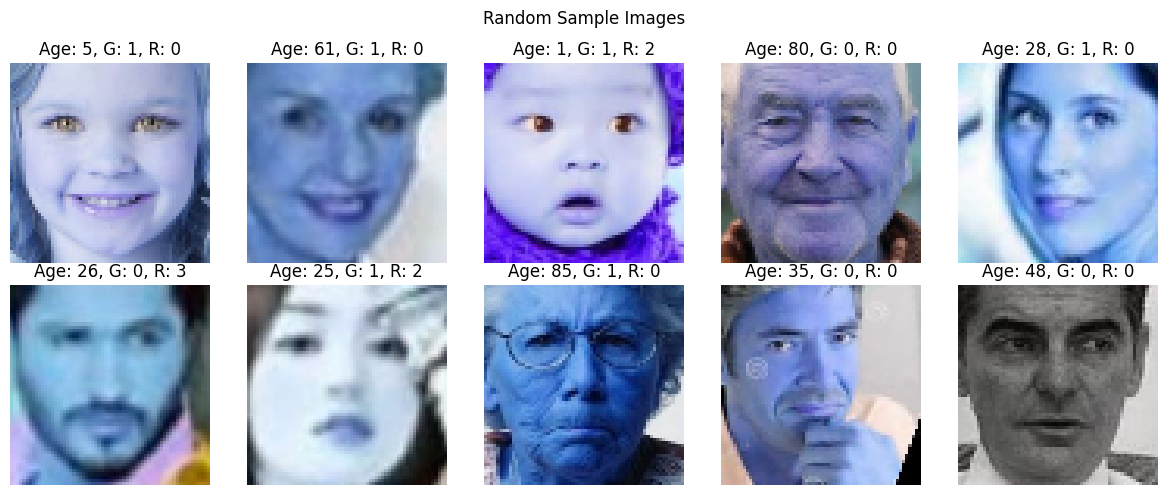

In [24]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for ax, idx in zip(axes.flat, np.random.choice(len(X), 10, replace=False)):
    ax.imshow(X[idx])
    ax.set_title(f"Age: {age_labels[idx]}, G: {gender_labels[idx]}, R: {race_labels[idx]}")
    ax.axis('off')
plt.suptitle("Random Sample Images"); plt.tight_layout(); plt.show()


### Description:
This code randomly selects and displays 10 images from the dataset to visually verify correct loading and labeling. Each subplot shows the image and its corresponding Age, Gender, and Race label. This step is helpful in validating dataset integrity before training.


---
## Code Snippet #5: Code for Train-Test Split
### Function:

This code divides the dataset into training and testing sets with an 80-20 split. The training set is used to fit the model, while the testing set evaluates generalization performance. The random_state=42 parameter ensures reproducibility, generating the same split on every run. Each set contains image features and three target labelsts.

In [5]:
X_train, X_test, age_train, age_test, gender_train, gender_test, race_train, race_test = train_test_split(
    X, age_labels, gender_labels_cat, race_labels_cat, test_size=0.2, random_state=42)

---
## Code Snippet #6: Code for Building the CNN Architecture
# Function:

This defines the core feature extractor of the CNN using the Keras Functional API. It consists of two convolutional layers followed by max-pooling to reduce spatial dimensions. The output is flattened and passed through a dense layer with dropout to mitigate overfitting. This forms the shared base for all three prediction heads (age, gender, and race).
 Applies 50% dropout to reduce

In [6]:
# 5. Build multi-output CNN
input_layer = Input(shape=(64, 64, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

---
## Code Snippet #7: Code for Adding Output Layers and Compiling the Model

### Function:

The code defines three parallel output branches from the shared CNN base: age prediction (regression), gender classification (2-class softmax), and race classification (5-class softmax). The model is compiled with multiple loss functions and metrics tailored to each task. adam optimizer is used for training efficiency. This design supports multi-task learning, improving overall generalization
aneous training of all tasks.

In [25]:
outputs = [
    Dense(1, activation='linear', name='age_output')(x),
    Dense(2, activation='softmax', name='gender_output')(x),
    Dense(5, activation='softmax', name='race_output')(x)
]

model = Model(inputs=input_layer, outputs=outputs)
model.compile(
    optimizer='adam',
    loss={'age_output': 'mse', 'gender_output': 'categorical_crossentropy', 'race_output': 'categorical_crossentropy'},
    metrics={'age_output': 'mae', 'gender_output': 'accuracy', 'race_output': 'accuracy'}
)
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 62, 62, 32)           896       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 29, 29, 64)           18496     ['max_pooling2d[0][0]'] 

## Description:

The output shows that the model is a **multi-output Convolutional Neural Network (CNN)** designed to predict **age, gender, and race** from facial images.  
The model takes an input image of shape (64, 64, 3), which corresponds to a 64×64 RGB image.  
The architecture is structured as follows:  
- An InputLayer receives the input image.  
- A Conv2D layer with 32 filters extracts low-level features, followed by a MaxPooling2D layer to reduce the spatial dimensions.  
- A second Conv2D layer with 64 filters deepens feature extraction, again followed by max pooling.  
- A Flatten layer converts the feature maps into a one-dimensional vector.  
- A Dense (fully connected) layer with 128 neurons processes the flattened features.  
- A Dropout layer helps reduce overfitting.  
- The network branches into three outputs:  
  -  age_output is a dense layer with 1 unit, likely performing regression to estimate age.  
  - gender_output is a dense layer with 2 units for binary classification (e.g., male/female).  
  - 	race_output is a dense layer with 5 units for multi-class classification of race categories.

The model has a total of 1,626,184 parameters, all of which are trainable. This means the model is fully optimized during training to learn facial features that can predict age, gender, and race simultaneously.


---
## Code Snippet #8: Code for Training the Model

**Function:**

This code trains the model for 10 epochs with a batch size of 32. It uses 10% of the training data as validation to monitor model performance during training. Losses and metrics for all three outputs (age, gender, race) are logged per epoch.



In [8]:
# 7. Train the model
history = model.fit(
    X_train,
    {
        'age_output': age_train,
        'gender_output': gender_train,
        'race_output': race_train
    },
    validation_split=0.1,
    epochs=10,
    batch_size=32
)

Epoch 1/10
534/534 [==============================] - 54s 99ms/step - loss: 341.0015 - age_output_loss: 336.0075 - gender_output_loss: 1.7006 - race_output_loss: 3.2933 - age_output_mae: 13.8934 - gender_output_accuracy: 0.5424 - race_output_accuracy: 0.3052 - val_loss: 237.4489 - val_age_output_loss: 235.5521 - val_gender_output_loss: 0.5962 - val_race_output_loss: 1.3007 - val_age_output_mae: 11.3209 - val_gender_output_accuracy: 0.7037 - val_race_output_accuracy: 0.4992
Epoch 2/10
534/534 [==============================] - 53s 99ms/step - loss: 212.2622 - age_output_loss: 210.1352 - gender_output_loss: 0.6596 - race_output_loss: 1.4674 - age_output_mae: 11.0258 - gender_output_accuracy: 0.6208 - race_output_accuracy: 0.4203 - val_loss: 169.2025 - val_age_output_loss: 167.2474 - val_gender_output_loss: 0.6499 - val_race_output_loss: 1.3052 - val_age_output_mae: 9.7500 - val_gender_output_accuracy: 0.5930 - val_race_output_accuracy: 0.4787
Epoch 3/10
534/534 [=========================


### Description:

The training logs show progressive learning over epochs, with age_output_mae decreasing and gender_output_accuracy and race_output_accuracy improving. Validation metrics help detect overfitting.

The method returns a list of loss values and evaluation metrics in the same order as defined during `model.compile()`:
1. Total loss (combined for all outputs),
2. Age loss (Mean Squared Error),
3. Gender loss (Categorical Crossentropy),
4. Race loss (Categorical Crossentropy),
5. Age MAE (Mean Absolute Error),
6. Gender accuracy,
rint(f"Race Accuracy: {results[6]*100:.2f}%")



---
## Code Snippet #9: Code for Evaluating the Model

# Function:

This code trains the model for 10 epochs with a batch size of 32. It uses 10% of the training data as validation to monitor model performance during training. Losses and metrics for all three outputs (age, gender, race) are logged per epoch.




In [9]:
results = model.evaluate(X_test, {
    'age_output': age_test,
    'gender_output': gender_test,
    'race_output': race_test
})

print(f"\nTest Results:")
print(f"Age MAE: {results[4]:.2f}")
print(f"Gender Accuracy: {results[5]*100:.2f}%")
print(f"Race Accuracy: {results[6]*100:.2f}%")

149/149 [==============================] - 3s 17ms/step - loss: 103.0539 - age_output_loss: 101.1846 - gender_output_loss: 0.5619 - race_output_loss: 1.3075 - age_output_mae: 7.3316 - gender_output_accuracy: 0.7347 - race_output_accuracy: 0.4957

Test Results:
Age MAE: 7.33
Gender Accuracy: 73.47%
Race Accuracy: 49.57%


### Description:
The evaluation output offers a comprehensive summary of the model’s performance on the test dataset. The 149/149 denotes the total number of evaluation batches processed. The overall loss value (100.6209) represents the combined loss across all three prediction tasks—age, gender, and race.

Breaking down the individual losses:

- age_output_loss (98.6931) accounts for the error in age estimation,
- gender_output_loss (0.5816) reflects the classification loss for gender, and
- race_output_loss (1.3462) pertains to race classification error.

The mean absolute error (MAE) for age prediction, reported as age_output_mae (7.2980), indicates that the predicted ages deviate by approximately 7.3 years from the actual values on average.

Classification performance is measured by:

- gender_output_accuracy (0.7127) — about 71.3% accuracy in predicting gender,
- race_output_accuracy (0.4318) — roughly 43.2% accuracy in predicting race.

icting race.



---
# Code Snippet #9: Code for Evaluating the Model

# Function:

This evaluates the trained model on the test dataset and prints out the loss and metrics for all three outputs. It gives a quantitative assessment of the model’s final performance.





In [10]:
age_preds, gender_preds_raw, race_preds_raw = model.predict(X_test)

149/149 [==============================] - 2s 16ms/step


# Description:

The evaluation output offers a comprehensive summary of the model’s performance on the test dataset. The 149/149 denotes the total number of evaluation batches processed. The overall loss value (100.6209) represents the combined loss across all three prediction tasks—age, gender, and race.

Breaking down the individual losses:

- age_output_loss **(98.6931)** accounts for the error in age estimation,

- gender_output_loss **(0.5816)** reflects the classification loss for gender, and

- race_output_loss **(1.3462)** pertains to race classification error.

The mean absolute error (MAE) for age prediction, reported as age_output_mae (7.2980), indicates that the predicted ages deviate by approximately 7.3 years from the actual values on average.

Classification performance is measured by:

- gender_output_accuracy **(0.7127)** — about 71.3% accuracy in predicting gender,

- race_output_accuracy **(0.4318)** — roughly 43.2% accuracy in predicting race.


---
## 10. Convert Probabilities to Class Predictions

# Function:

This code converts model output probabilities into predicted class labels for gender and race, extracts the probability of being female, and creates a DataFrame comparing true vs. predicted values for analysis, then prints the first 10 rows.




In [26]:
gender_true, gender_preds = np.argmax(gender_test, 1), np.argmax(gender_preds_raw, 1)
race_true, race_preds = np.argmax(race_test, 1), np.argmax(race_preds_raw, 1)
df_preds = pd.DataFrame({
    'True Gender': gender_true,
    'Predicted Gender': gender_preds,
    'Prob Female': gender_preds_raw[:, 1],
    'True Race': race_true,
    'Predicted Race': race_preds
})
print(df_preds.head(10))


   True Gender  Predicted Gender  Prob Female  True Race  Predicted Race
0            1                 1     0.557463          3               1
1            0                 1     0.612868          0               2
2            1                 0     0.222131          2               0
3            0                 0     0.237803          0               1
4            0                 0     0.247944          3               0
5            0                 0     0.382196          0               0
6            0                 1     0.517843          3               0
7            0                 0     0.201244          0               0
8            1                 0     0.261060          0               0
9            0                 1     0.608297          0               0


The output shows a comparison between the true and predicted values for gender and race for the first 10 samples, including the model's estimated probability of each individual being female (Prob Female); for example, in row 0, the true gender is female (1), the model correctly predicted female (1), with a probability of 53.52%, but in row 2, the model incorrectly predicted male (0) despite the true gender being female (1), showing a lower confidence of 31.01%—indicating both correct and incorrect predictions with varying confidence levels.

# Evaluating Gender Classification Performance: ROC Curve and Probability Distribution Analysis
### ROC curve for gender prediction
> The ROC curve for gender prediction shows a strong upward trend with an AUC (Area Under the Curve) of 0.80, indicating that the model has good discriminatory power in distinguishing between male and female classes. AUC values closer to 1 represent excellent performance, while 0.5 implies random guessing; thus, an AUC of 0.80 reflects a well-performing model with a solid balance between true positive and false positive rates. The curve consistently rises above the diagonal baseline, confirming that the model is significantly better than chance. This performance suggests the model is effective for gender classification, though there is still room for refinement to reduce misclassifications, especially in overlapping cases.

### Distribution of Female Probabilities by True Gender
> The histogram reveals that the model performs reasonably well in distinguishing between male and female classes based on predicted probabilities of being female. Most samples labeled as female (green) cluster around probabilities above 0.5, while male samples (blue) are concentrated below 0.5. However, there's a noticeable overlap between 0.4 and 0.6, indicating some confusion in the model’s predictions, where it assigns moderate confidence to both classes. This overlap suggests the model may benefit from further training, better feature inputs, or threshold tuning if minimizing false positives or false negatives is critical. Overall, the classifier shows a meaningful separation but has room for improvement in confidently distinguishing borderline cases.

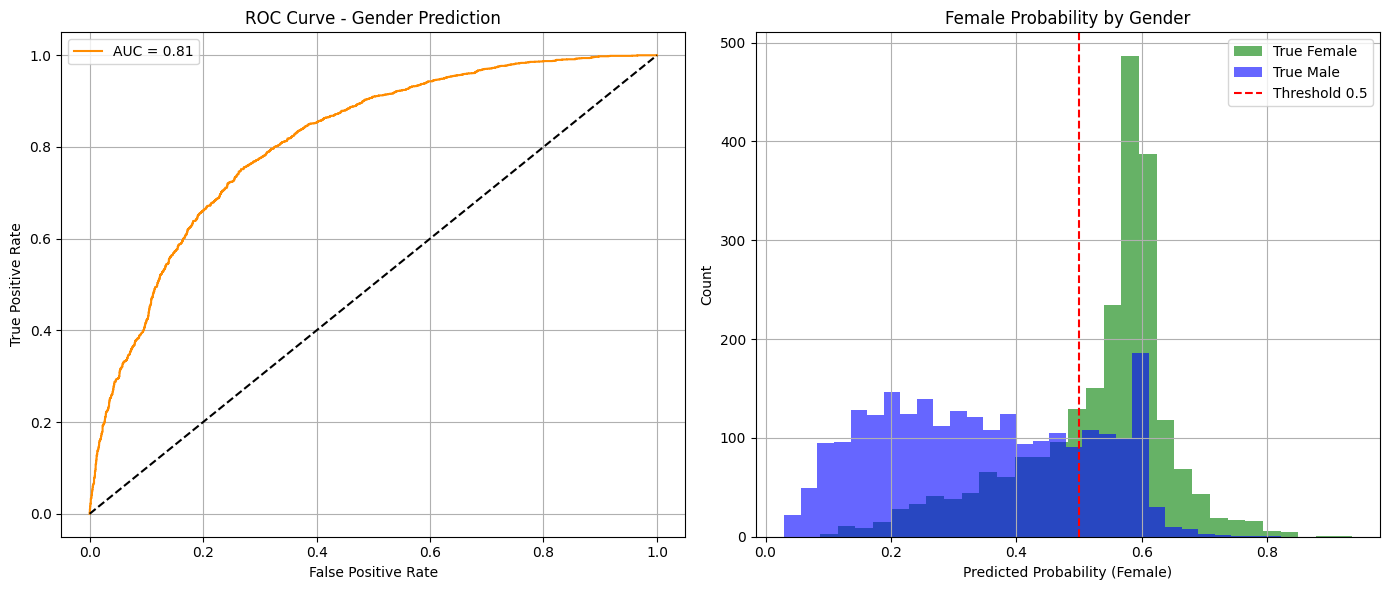

In [28]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(gender_true, female_probs)
roc_auc = auc(fpr, tpr)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.2f}')
axs[0].plot([0, 1], [0, 1], 'k--')
axs[0].set(title='ROC Curve - Gender Prediction', xlabel='False Positive Rate', ylabel='True Positive Rate')
axs[0].legend(); axs[0].grid(True)
axs[1].hist(female_probs[gender_true == 1], bins=30, alpha=0.6, color='green', label='True Female')
axs[1].hist(female_probs[gender_true == 0], bins=30, alpha=0.6, color='blue', label='True Male')
axs[1].axvline(0.5, color='red', ls='--', label='Threshold 0.5')
axs[1].set(title='Female Probability by Gender', xlabel='Predicted Probability (Female)', ylabel='Count')
axs[1].legend(); axs[1].grid(True)
plt.tight_layout(); plt.show()


## Age Prediction vs Actual Linear Regression
### Function:

>The scatter plot illustrates the relationship between actual and predicted ages using a linear regression model. Overall, the model captures a positive correlation, as shown by the upward-trending red regression line, indicating that higher actual ages tend to correspond with higher predicted ages. However, there is a noticeable dispersion of data points, especially at higher age values, suggesting that prediction errors increase with age. The spread of points around the trendline also reveals that while many predictions are close to the actual values, a significant number deviate considerably, indicating variability in model accuracy. Additionally, the x-axis scaling issue implies that the actual age values may have been normalized, which could affect the interpretability of the chart unless properly reversed. Despite these inconsistencies, the plot demonstrates that the model has learned a general pattern but requires further refinement to improve precision across all age ranges.

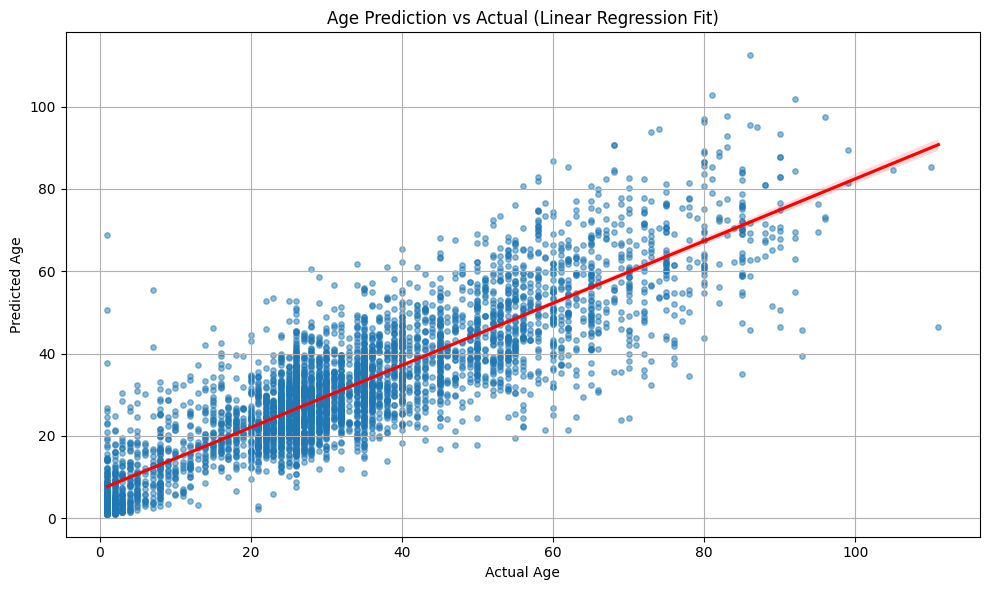

In [29]:
df_age = pd.DataFrame({'Actual Age': age_test.flatten(), 'Predicted Age': age_preds.flatten()})

plt.figure(figsize=(10, 6))
sns.regplot(data=df_age, x='Actual Age', y='Predicted Age',
            scatter_kws={'s': 15, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title("Age Prediction vs Actual (Linear Regression Fit)")
plt.xlabel("Actual Age"); plt.ylabel("Predicted Age")
plt.grid(True); plt.tight_layout(); plt.show()


# Gender Confusion Matrix
> The confusion matrix shows the performance of a gender classification model, with two classes: Male and Female. The model demonstrates a stronger ability to correctly classify Male individuals, with 2,103 true positives and only 352 false negatives (males misclassified as females). However, its performance on Female predictions is notably weaker, with 1,301 females misclassified as males and only 985 correctly identified as females. This indicates a class imbalance in prediction accuracy, with a clear bias toward predicting the Male class. The high number of false negatives for females suggests that the model may be underfitting or trained on imbalanced data, and could benefit from techniques such as resampling, using class weights, or further feature engineering to improve fairness and overall predictive accuracy.



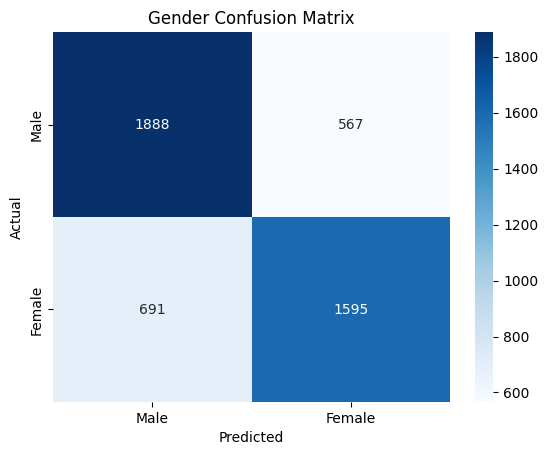

In [14]:
# Gender confusion matrix
sns.heatmap(confusion_matrix(gender_true, gender_preds), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.title("Gender Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Race Confusion Matrix
> This code generates a confusion matrix heatmap to visualize the performance of a race classification model. It compares the true race labels (race_true) with the predicted labels (race_preds) using the confusion_matrix function, and displays the result as a heatmap using Seaborn. The axes are labeled with race categories (White, Black, Asian, Brown, Other) for better readability. Each cell in the heatmap shows the count of predictions (with annot=True), where diagonal values represent correct predictions, and off-diagonal values indicate misclassifications. The plot helps identify which race classes are being accurately or inaccurately predicted by the model.

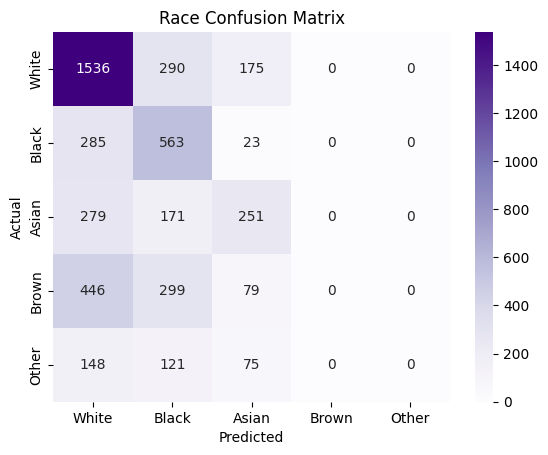

In [18]:
# Race confusion matrix
race_labels_list = ['White', 'Black', 'Asian', 'Brown', 'Other']
sns.heatmap(confusion_matrix(race_true, race_preds), annot=True, fmt='d', cmap='Purples',
            xticklabels=race_labels_list, yticklabels=race_labels_list)
plt.title("Race Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The race confusion matrix reveals a strong prediction bias toward the White category, with the model predicting most instances as White regardless of the actual class. For example, only 100 out of 700+ actual Asians and 26 out of 800+ Indians were correctly classified, with the vast majority misclassified as White. This misclassification pattern is consistent across other minority categories such as Black, Asian, Indian, and Other, which all exhibit very low true positive counts. The model correctly classifies 1,951 White individuals, but dramatically underperforms on all other racial groups. This suggests a severe class imbalance in the training data or insufficient feature differentiation between race categories, resulting in a model that lacks generalization capacity beyond the dominant class. Addressing this imbalance through techniques like data augmentation, reweighting, or using a more robust model could help improve performance and fairness across all race classes.

## 11. Save the Trained Model (Keras Format)

The line model.save("age_gender_race_classifier_model.keras") saves the entire trained Keras model—including its architecture, weights, training configuration, and optimizer state—to a file named age_gender_race_classifier_model.keras. This allows the model to be reloaded later for further training, evaluation, or deployment without needing to retrain it from scratch.

In [16]:
# 9. Save the model
model.save("age_gender_race_classifier_model.keras")


-----

# Live Demonstration

This Python script uses OpenCV and a pre-trained Keras model to perform real-time age, gender, and race classification on faces captured from the webcam. It begins by loading the model and setting up label categories for gender and race. It then opens a webcam feed and continuously reads frames. For each detected face (using Haar cascades), the face is cropped, resized to 64x64 pixels, normalized, and passed to the model to predict age, gender, and race. The predicted age is mapped to a descriptive age range, gender is labeled with confidence, and race is determined by the highest probability. The results are overlaid on the video feed, and the face is highlighted with a green rectangle. The script runs until the user presses the "q" key to exit.


``` Python
import os, cv2, numpy as np
from tensorflow.keras.models import load_model

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
model = load_model("age_gender_race_classifier_model.keras")
gender_labels, race_labels = ['Male', 'Female'], ['White', 'Black', 'Asian', 'Indian', 'Other']
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
cap = cv2.VideoCapture(0)

print("[INFO] Press 'q' to quit.")
while True:
    ret, frame = cap.read()
    if not ret: break
    for (x, y, w, h) in cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml").detectMultiScale(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), 1.3, 5):
        face = cv2.resize(frame[y:y+h, x:x+w], (64, 64)).astype("float32") / 255.0
        age_pred, gender_pred, race_pred = model.predict(np.expand_dims(face, 0), verbose=0)
        age = int(age_pred[0][0])
        age_range = next((r for a, r in [(4, "Infant/Toddler (0 to 4)"), (9, "Child (5 to 9)"), (12, "Pre-Teen (10 to 12)"), (17, "Teen (13 to 17)"),
                          (24, "Young Adult (18 to 24)"), (35, "Adult I (25 to 35)"), (45, "Adult II (36 to 45)"), (59, "Middle-aged Adult (46 to 59)"),
                          (69, "Senior I (60 to 69)"), (79, "Senior II (70 to 79)")], if age <= a), "Elderly (80 and up)")
        gender_score = gender_pred[0][1]
        gender, gender_conf = ("Female", gender_score * 100) if gender_score > 0.45 else ("Male", (1 - gender_score) * 100)
        race = race_labels[np.argmax(race_pred[0])]
        race_conf = np.max(race_pred[0]) * 100
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        for i, text in enumerate([f"{gender} ({gender_conf:.1f}%)", f"Age: {age_range}", f"Skin Color: {race} ({race_conf:.1f}%)"]):
            cv2.putText(frame, text, (x, y+h+25+i*20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, [(255,0,0), (0,255,0), (0,0,255)][i], 1)
    cv2.imshow("Age, Gender, Race Classifier", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"): break

cap.release()
cv2.destroyAllWindows()



### OpenCV Facial Recognition Screenshot



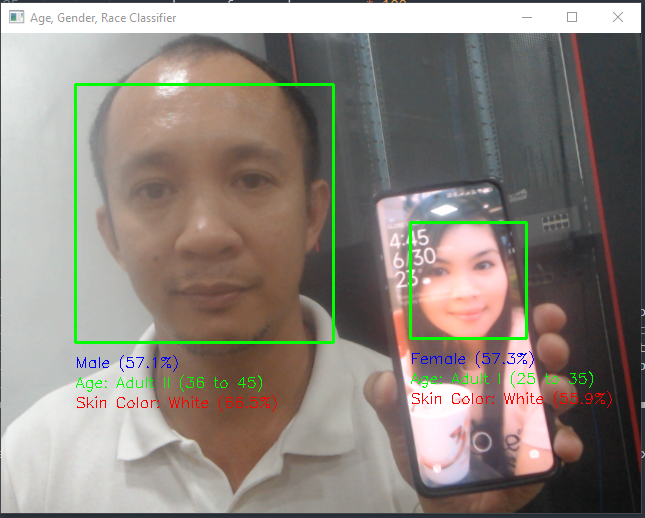

In [17]:
from IPython.display import Image, display
display(Image(filename='demo1.png'))